In [1]:
import cv2
import os
from PIL import Image
import numpy as np
dim = (30, 30)
X_train =[]
Y_train=[]
n=0

#read train data
path='/kaggle/input/gtsrb-german-traffic-sign/train'
grup = os.listdir(path)
for i in grup:
    tem=os.path.join(path, i)
    img_nams=os.listdir(tem)
    n+=1
    for imasg in img_nams:
        img=np.array(Image.open(os.path.join(tem,imasg )).resize((30,30),Image.ANTIALIAS))
        X_train.append(img)
        s=int(i)
        Y_train.append(s)



X_t=np.array(X_train)
X_t = X_t.astype('float32')
X_train=X_t/255.0


Y_t=np.array(Y_train)
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_t)
#print(n)

#SHUFFLE DATA
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train,Y_train, random_state=0)




Using TensorFlow backend.


In [2]:
# relu model without batchnormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


trained_model = model.fit(X_train, Y_train, batch_size=128, epochs=50 , validation_split = 0.2)

history=trained_model.history



Train on 31367 samples, validate on 7842 samples
Epoch 1/50
31367/31367 [==============================] - 6s 191us/step - loss: 1.1403 - accuracy: 0.7092 - val_loss: 0.2654 - val_accuracy: 0.9368
Epoch 2/50
31367/31367 [==============================] - 2s 56us/step - loss: 0.1822 - accuracy: 0.9550 - val_loss: 0.1566 - val_accuracy: 0.9616
Epoch 3/50
31367/31367 [==============================] - 2s 56us/step - loss: 0.0868 - accuracy: 0.9773 - val_loss: 0.0949 - val_accuracy: 0.9777
Epoch 4/50
31367/31367 [==============================] - 2s 59us/step - loss: 0.0509 - accuracy: 0.9869 - val_loss: 0.0912 - val_accuracy: 0.9792
Epoch 5/50
31367/31367 [==============================] - 2s 58us/step - loss: 0.0351 - accuracy: 0.9911 - val_loss: 0.0797 - val_accuracy: 0.9821
Epoch 6/50
31367/31367 [==============================] - 2s 55us/step - loss: 0.0197 - accuracy: 0.9945 - val_loss: 0.0809 - val_accuracy: 0.9833
Epoch 7/50
31367/31367 [==============================] - 2s 54us/st

In [7]:
# relu model with batchnormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import BatchNormalization

model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(43, activation='softmax'))



model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


trained_model1 = model1.fit(X_train, Y_train, batch_size=128, epochs=30 , validation_split = 0.2)

history1=trained_model1.history

Train on 31367 samples, validate on 7842 samples
Epoch 1/30
31367/31367 [==============================] - 3s 110us/step - loss: 0.4764 - accuracy: 0.8820 - val_loss: 3.7103 - val_accuracy: 0.1403
Epoch 2/30
31367/31367 [==============================] - 3s 87us/step - loss: 0.0511 - accuracy: 0.9897 - val_loss: 1.1489 - val_accuracy: 0.6835
Epoch 3/30
31367/31367 [==============================] - 2s 78us/step - loss: 0.0156 - accuracy: 0.9976 - val_loss: 0.0569 - val_accuracy: 0.9867
Epoch 4/30
31367/31367 [==============================] - 3s 80us/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0448 - val_accuracy: 0.9887
Epoch 5/30
31367/31367 [==============================] - 2s 79us/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0351 - val_accuracy: 0.9923
Epoch 6/30
31367/31367 [==============================] - 3s 83us/step - loss: 9.8077e-04 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9923
Epoch 7/30
31367/31367 [==============================] - 2s 79u

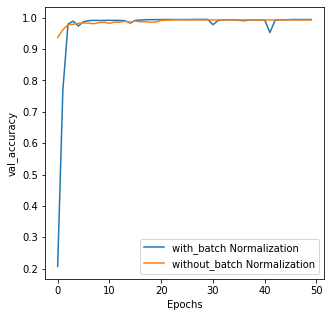

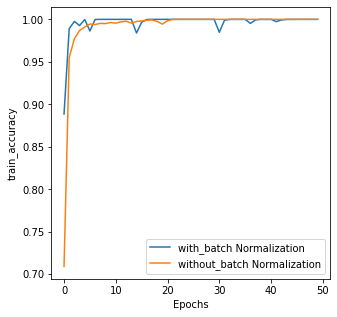

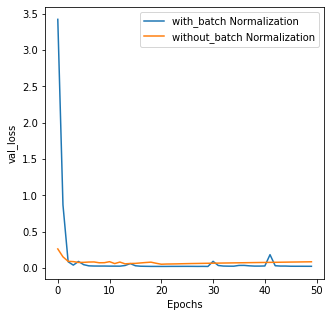

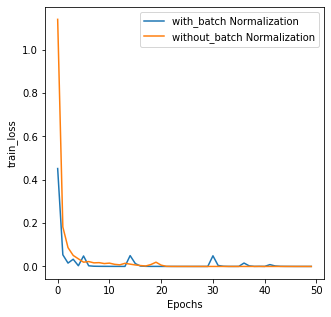

In [6]:
#plot
import matplotlib.pyplot as plt

val_acc_with_batch = history1['val_accuracy']
train_acc_with_batch=history1['accuracy']

train_losses_with_batch=history1['loss']
val_losses_with_batch=history1['val_loss']
#
val_acc_without_batch = history['val_accuracy']
train_acc_without_batch=history['accuracy']

train_losses_without_batch =history['loss']
val_losses_without_batch=history['val_loss']


plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(val_acc_with_batch)
plt.plot(val_acc_without_batch)
plt.legend(['with_batch Normalization','without_batch Normalization'])
plt.show()

plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('train_accuracy')
plt.plot(train_acc_with_batch)
plt.plot(train_acc_without_batch)
plt.legend(['with_batch Normalization','without_batch Normalization'])
plt.show()




plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.plot(val_losses_with_batch)
plt.plot(val_losses_without_batch)
plt.legend(['with_batch Normalization','without_batch Normalization'])
plt.show()


plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('train_loss')
plt.plot(train_losses_with_batch)
plt.plot(train_losses_without_batch)
plt.legend(['with_batch Normalization','without_batch Normalization'])
plt.show()



In [ ]:
from keras.utils import plot_model

plot_model(model ,to_file = 'model.png' , show_shapes=True, show_layer_names=True )


import matplotlib.pyplot as plt


losses=history['loss']
val_losses=history['val_loss']

acc=history['accuracy']
val_acc = history['val_accuracy']



plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['train loss','val_loss'])

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train accuracy','val_accuracy'])

In [ ]:
#read test data
import pandas as pd
data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

X_test =[]
Y_test=[]
path='/kaggle/input/gtsrb-german-traffic-sign/test'

grup = os.listdir(path)
for imasg in grup:
    n+=1
    if(imasg!='GT-final_test.csv'):
        img=np.array(Image.open(os.path.join(path,imasg )).resize((30,30),Image.ANTIALIAS))
        X_test.append(img)
        p=(os.path.join('Test',imasg ))
        Y_test.append(data.loc[data['Path'] == p, 'ClassId'].iloc[0])

        
        
X_t=np.array(X_test)
X_t = X_t.astype('float32')
X_test=X_t/255.0

print(X_test.shape)


Y_t=np.array(Y_test)
from keras.utils import np_utils
Y_test=np_utils.to_categorical(Y_t)
print(Y_test.shape)

test_loss,test_acc=model1.evaluate(X_test,Y_test)


predicted_labels=model1.predict(X_test)
print(predicted_labels.shape)
print("test_loss",test_loss)
print("test_acc" , test_acc)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

dict = {0:"Speed limit (20km/h)",1:"Speed limit (30km/h)",2:"Speed limit (50km/h)",3:"Speed limit (60km/h)",4:"Speed limit (70km/h)"
        ,5:"Speed limit (80km/h)",6:"End of speed limit (80km/h)",7:"Speed limit (100km/h)",8:"Speed limit (120km/h)",9:"No passing" ,
         10:"No passing for vehicles over 3.5 metric tons" ,11:"Right-of-way at the next intersection" , 12:"Priority road" ,
       13:"Yield" , 14:"Stop" , 15:"No vehicles" , 16:"Vehicles over 3.5 metric tons prohibited" , 17:"No entry" ,
       18:"General caution" , 19:"Dangerous curve to the left" , 20:""}
target_names = [dict[x] for x in range(0,10)]

plt.figure()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names , normalize=True, title='matrix')